In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [3]:
train=pd.read_table('train.tsv')

In [4]:
test=pd.read_table('test.tsv')

In [5]:
import matplotlib.pyplot as plt

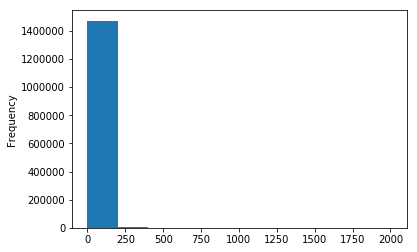

In [6]:
#it's skewed
train['price'].plot.hist()
plt.show()

In [29]:
y=np.log1p(train.price)
train_col=['name','item_condition_id','category_name','brand_name','shipping','item_description']
X=train[train_col]
id=test.test_id
test=test[train_col]
del train

NameError: name 'train' is not defined

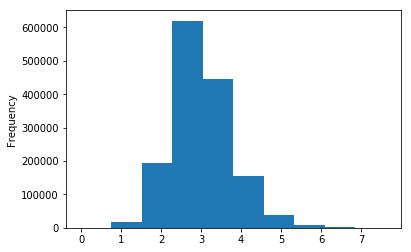

In [8]:
y.plot.hist()
plt.show()

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 6 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: int64(2), object(4)
memory usage: 67.9+ MB


In [11]:
X.head(3)

,name,item_condition_id,category_name,brand_name,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...


In [16]:
def split_cate(x):
    if str(x).count('/')==2:
        return str(x).split('/')
    else:
        return ['null','null','null']

In [17]:
X.count()

name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
shipping             1482535
item_description     1482531
dtype: int64

In [18]:
test.count()

name                 693359
item_condition_id    693359
category_name        690301
brand_name           397834
shipping             693359
item_description     693359
dtype: int64

In [21]:
def convert_feats(X):
    X['item_description'].fillna('no description',inplace=True)
    X['category_name'].fillna('other/other/other',inplace=True)
    X['brand_name'].fillna('nan',inplace=True)
    X['cate1'],X['cate2'],X['cate3']=zip(*X['category_name'].apply(split_cate))
    return X

In [22]:
X=convert_feats(X)

In [23]:
X

,name,item_condition_id,category_name,brand_name,shipping,item_description,cate1,cate2,cate3
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,nan,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,nan,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,nan,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
5,Bundled items requested for Ruie,3,Women/Other/Other,nan,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other
6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls
8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls
9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,nan,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll


In [26]:
zip(X['category_name'].apply(split_cate))

[(['Men', 'Tops', 'T-shirts'],),
 (['Electronics', 'Computers & Tablets', 'Components & Parts'],),
 (['Women', 'Tops & Blouses', 'Blouse'],),
 (['Home', 'Home D\xc3\xa9cor', 'Home D\xc3\xa9cor Accents'],),
 (['Women', 'Jewelry', 'Necklaces'],),
 (['Women', 'Other', 'Other'],),
 (['Women', 'Swimwear', 'Two-Piece'],),
 (['Sports & Outdoors', 'Apparel', 'Girls'],),
 (['Sports & Outdoors', 'Apparel', 'Girls'],),
 (['Vintage & Collectibles', 'Collectibles', 'Doll'],),
 (['Beauty', 'Makeup', 'Face'],),
 (['Beauty', 'Fragrance', 'Women'],),
 (['Women', 'Dresses', 'Above Knee, Mini'],),
 (['Other', 'Office supplies', 'School Supplies'],),
 (['Women', 'Shoes', 'Boots'],),
 (['Beauty', 'Makeup', 'Makeup Sets'],),
 (['Beauty', 'Makeup', 'Eyes'],),
 (['Kids', 'Gear', 'Backpacks & Carriers'],),
 (['Beauty', 'Makeup', 'Makeup Palettes'],),
 (['Women', 'Tops & Blouses', 'Blouse'],),
 (['Women', 'Tops & Blouses', 'Tank, Cami'],),
 (['Women', 'Athletic Apparel', 'Sports Bras'],),
 (['Electronics', 'Cel

In [27]:
zip(*X['category_name'].apply(split_cate))

[('Men',
  'Electronics',
  'Women',
  'Home',
  'Women',
  'Women',
  'Women',
  'Sports & Outdoors',
  'Sports & Outdoors',
  'Vintage & Collectibles',
  'Beauty',
  'Beauty',
  'Women',
  'Other',
  'Women',
  'Beauty',
  'Beauty',
  'Kids',
  'Beauty',
  'Women',
  'Women',
  'Women',
  'Electronics',
  'Electronics',
  'Women',
  'Men',
  'Electronics',
  'Women',
  'Women',
  'Women',
  'Beauty',
  'Women',
  'Women',
  'Beauty',
  'Kids',
  'Women',
  'Women',
  'Men',
  'Electronics',
  'Women',
  'Beauty',
  'Women',
  'Beauty',
  'Beauty',
  'Vintage & Collectibles',
  'Women',
  'Kids',
  'Women',
  'Women',
  'Beauty',
  'Women',
  'Kids',
  'Vintage & Collectibles',
  'Women',
  'Home',
  'Vintage & Collectibles',
  'Beauty',
  'Kids',
  'Kids',
  'Electronics',
  'Women',
  'Women',
  'Women',
  'Women',
  'Men',
  'Kids',
  'Women',
  'Women',
  'Women',
  'Electronics',
  'Women',
  'Women',
  'Home',
  'Kids',
  'Home',
  'Kids',
  'Women',
  'Home',
  'Men',
  'Kids',

In [28]:
X['category_name'].apply(split_cate)

0                                      [Men, Tops, T-shirts]
1          [Electronics, Computers & Tablets, Components ...
2                            [Women, Tops & Blouses, Blouse]
3                     [Home, Home Décor, Home Décor Accents]
4                                [Women, Jewelry, Necklaces]
5                                      [Women, Other, Other]
6                               [Women, Swimwear, Two-Piece]
7                        [Sports & Outdoors, Apparel, Girls]
8                        [Sports & Outdoors, Apparel, Girls]
9               [Vintage & Collectibles, Collectibles, Doll]
10                                    [Beauty, Makeup, Face]
11                                [Beauty, Fragrance, Women]
12                        [Women, Dresses, Above Knee, Mini]
13                 [Other, Office supplies, School Supplies]
14                                     [Women, Shoes, Boots]
15                             [Beauty, Makeup, Makeup Sets]
16                      

In [32]:
test=convert_feats(test)

In [34]:
for col in X.columns:
    if X[col].dtypes=='object':
        X[col]=X[col].astype('category')
for col in test.columns:
    if test[col].dtypes=='object':
        test[col]=test[col].astype('category')

In [35]:
X.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,cate1,cate2,cate3
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,nan,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,nan,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,nan,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [37]:
all_data=pd.concat([X,test],axis=0)

In [83]:
all_data

,index,name,item_condition_id,category_name,brand_name,shipping,item_description,cate1,cate2,cate3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,5267,1,No description yet,5,102,769
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,3889,0,This keyboard is in great condition and works ...,1,30,215
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,4588,1,Adorable top with a hint of lace and a key hol...,9,103,97
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,5267,1,New with tags. Leather horses. Retail for [rm]...,3,55,407
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,5267,0,Complete with certificate of authenticity,9,58,538
5,5,Bundled items requested for Ruie,3,Women/Other/Other,5267,0,"Banana republic bottoms, Candies skirt with ma...",9,72,560
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,84,0,Size small but straps slightly shortened to fi...,9,98,831
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,4341,1,You get three pairs of Sophie cheer shorts siz...,7,2,355
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,3337,0,Girls Size small Plus green. Three shorts total.,7,2,355
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,5267,0,I realized his pants are on backwards after th...,8,29,261


In [39]:
cat_feats=['brand_name','cate1','cate2','cate3']
for col in cat_feats:
    all_data[col]=pd.Categorical(all_data[col]).codes

In [57]:
all_data=all_data.reset_index()

In [44]:
X.shape

(1482535, 9)

In [77]:
X=all_data.loc[:1482534,:]
test=all_data.loc[1482535:,:]

In [78]:
X.shape

(1482535, 10)

In [79]:
test.shape

(693359, 10)

In [80]:
y.shape

(1482535L,)

In [81]:
id.shape

(693359L,)

In [85]:
drop_list=['name','category_name','item_description']
X_train=X.drop(drop_list,axis=1)
X_test=test.drop(drop_list,axis=1)

In [86]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X_train, y, test_size = 0.15, random_state = 201) 

In [87]:
data_train = xgb.DMatrix(train_X, label=train_y)
data_valid = xgb.DMatrix(valid_X, label=valid_y)
 
watchlist = [(data_train, 'train'), (data_valid, 'valid')]
xgb_params = {'min_child_weight': 20,
              'eta': 0.013,
              'colsample_bytree': 0.45,
              'max_depth': 16,
            'subsample': 0.88,
              'lambda': 2.07,
              'nthread': 4,
              'booster' :
              'gbtree',
              'silent': 1,
            'eval_metric': 'rmse',
              'objective': 'reg:linear'}

In [88]:
model_xgb = xgb.train(xgb_params, data_train, 2000, watchlist, early_stopping_rounds=20, verbose_eval=10)

[0]	train-rmse:2.55797	valid-rmse:2.55853
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[10]	train-rmse:2.26507	valid-rmse:2.26561
[20]	train-rmse:2.01106	valid-rmse:2.01157
[30]	train-rmse:1.79021	valid-rmse:1.79072
[40]	train-rmse:1.59756	valid-rmse:1.598
[50]	train-rmse:1.43253	valid-rmse:1.43296
[60]	train-rmse:1.29024	valid-rmse:1.29067
[70]	train-rmse:1.16825	valid-rmse:1.16871
[80]	train-rmse:1.06446	valid-rmse:1.06501
[90]	train-rmse:0.975734	valid-rmse:0.97644
[100]	train-rmse:0.902316	valid-rmse:0.903203
[110]	train-rmse:0.841126	valid-rmse:0.842244
[120]	train-rmse:0.789464	valid-rmse:0.790748
[130]	train-rmse:0.746595	valid-rmse:0.748219
[140]	train-rmse:0.710688	valid-rmse:0.712682
[150]	train-rmse:0.681106	valid-rmse:0.683385
[160]	train-rmse:0.657402	valid-rmse:0.660005
[170]	train-rmse:0.638465	valid-rmse:0.641402
[180]	train-rmse:0.622866	valid-rmse:0.626131
[190]	train-r

[1750]	train-rmse:0.529451	valid-rmse:0.549874
[1760]	train-rmse:0.529427	valid-rmse:0.549874
[1770]	train-rmse:0.529381	valid-rmse:0.549864
[1780]	train-rmse:0.529334	valid-rmse:0.549849
[1790]	train-rmse:0.529305	valid-rmse:0.549847
[1800]	train-rmse:0.529274	valid-rmse:0.549839
[1810]	train-rmse:0.529239	valid-rmse:0.549829
[1820]	train-rmse:0.529194	valid-rmse:0.549812
[1830]	train-rmse:0.529147	valid-rmse:0.549808
[1840]	train-rmse:0.529112	valid-rmse:0.549797
[1850]	train-rmse:0.529067	valid-rmse:0.549779
[1860]	train-rmse:0.529033	valid-rmse:0.549775
[1870]	train-rmse:0.528992	valid-rmse:0.54977
[1880]	train-rmse:0.528963	valid-rmse:0.549761
[1890]	train-rmse:0.528924	valid-rmse:0.549758
[1900]	train-rmse:0.528888	valid-rmse:0.549758
[1910]	train-rmse:0.528859	valid-rmse:0.549755
[1920]	train-rmse:0.528837	valid-rmse:0.549753
[1930]	train-rmse:0.528784	valid-rmse:0.549749
[1940]	train-rmse:0.528728	valid-rmse:0.549735
[1950]	train-rmse:0.528696	valid-rmse:0.549733
[1960]	train-r

In [91]:
X_test=xgb.DMatrix(X_test)
pre=model_xgb.predict(X_test)

In [93]:
from pandas import DataFrame
sub=DataFrame()
sub['test_id']=id
sub['price']=np.expm1(pre)

In [94]:
sub.to_csv("submission.csv")